## Multimodal Data

In [1]:
import requests

# You can use your own uploaded images and captions. 
# You will be responsible for the legal use of images that 
#  you are going to use.

url1='http://farm3.staticflickr.com/2519/4126738647_cc436c111b_z.jpg'
cap1='A motorcycle sits parked across from a herd of livestock'

url2='http://farm3.staticflickr.com/2046/2003879022_1b4b466d1d_z.jpg'
cap2='Motorcycle on platform to be worked on in garage'

url3='http://farm1.staticflickr.com/133/356148800_9bf03b6116_z.jpg'
cap3='a cat laying down stretched out near a laptop'

img1 = {
  'flickr_url': url1,
  'caption': cap1,
  'image_path' : './shared_data/motorcycle_1.jpg'
}

img2 = {
    'flickr_url': url2,
    'caption': cap2,
    'image_path' : './shared_data/motorcycle_2.jpg'
}

img3 = {
    'flickr_url' : url3,
    'caption': cap3,
    'image_path' : './shared_data/cat_1.jpg'
}

# download images
imgs = [img1, img2, img3]
for img in imgs:
    data = requests.get(img['flickr_url']).content
    with open(img['image_path'], 'wb') as f:
        f.write(data)

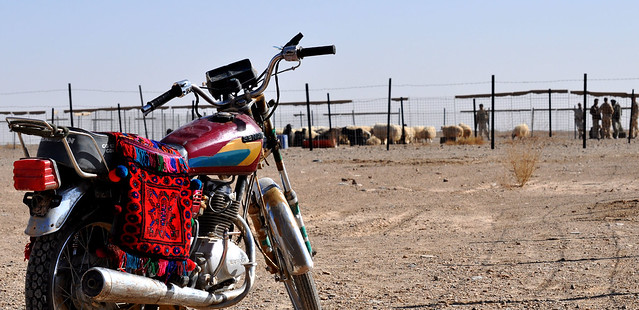

'A motorcycle sits parked across from a herd of livestock'

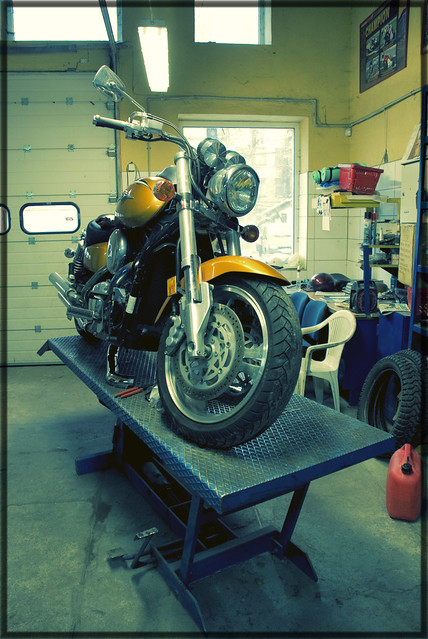

'Motorcycle on platform to be worked on in garage'

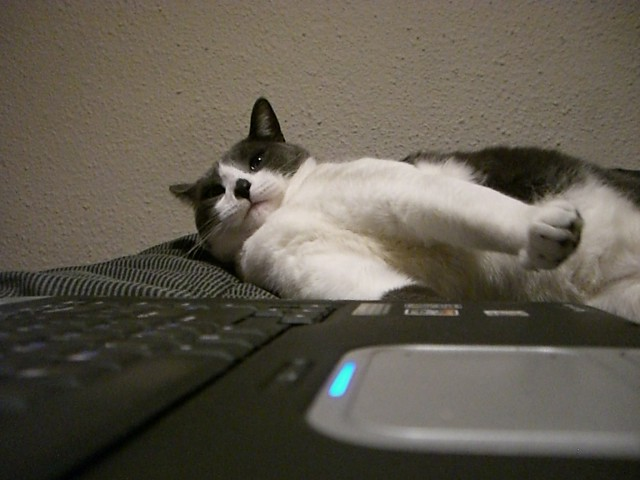

'a cat laying down stretched out near a laptop'

In [2]:
from PIL import Image
from IPython.display import display

for img in [img1, img2, img3]:
    image = Image.open(img['image_path'])
    caption = img['caption']
    display(image)
    display(caption)
    print()

## BridgeTower Embedding Computation

### Setup

In [3]:
import json
import os
import numpy as np
from numpy.linalg import norm
import cv2
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tqdm import tqdm
from utils import encode_image
from utils import bt_embedding_from_prediction_guard as bt_embeddings

### Compute Embedding

In [4]:
embeddings = []
for img in [img1, img2, img3]:
    img_path = img['image_path']
    caption = img['caption']
    base64_img = encode_image(img_path)
    embedding = bt_embeddings(caption, base64_img)
    embeddings.append(embedding)
    

In [5]:
# Each image-text pair is now converted into multimodal 
# embedding vector which has dimensions of 512.

print(len(embeddings[0]))

512


### Cosine Similarity Between Embedding Vectors

In [6]:
def cosine_similarity(vec1, vec2):
    similarity = np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))
    return similarity

In [7]:
ex1_embed = np.array(embeddings[0])
ex2_embed = np.array(embeddings[1])
ex3_embed = np.array(embeddings[2])
sim_ex1_ex2 = cosine_similarity(ex1_embed, ex2_embed)
sim_ex1_ex3 = cosine_similarity(ex1_embed, ex3_embed)

In [8]:
print("Cosine similarity between ex1_embeded and ex2_embeded is:")
display(sim_ex1_ex2)
print("Cosine similarity between ex1_embeded and ex3_embeded is:")
display(sim_ex1_ex3)

Cosine similarity between ex1_embeded and ex2_embeded is:


0.48566270290489155

Cosine similarity between ex1_embeded and ex3_embeded is:


0.17133985252863604

<p style="background-color:#fff1d7; padding:15px; "> <b>Note:</b>
As expected, since the 1st and the 2nd images all depict motorcycles 
<br>
and the third image depicts a cat, which is different from motorcycle, 
<br>
the Cosine similarity between the 1st and the 2nd examples' embeddings
<br> 
is greater than that between the 1st and the 3rd examples' embeddings.
</p>

### Euclidean Distance Between Embedding Vectors

In [9]:
dist_ex1_ex2 = cv2.norm(ex1_embed, ex2_embed, cv2.NORM_L2)
dist_ex1_ex3 = cv2.norm(ex1_embed, ex3_embed, cv2.NORM_L2)

print("Euclidean distance between ex1_embeded and ex2_embeded is:")
display(dist_ex1_ex2)

print("Euclidean distance between ex1_embeded and ex3_embeded is:")
display(dist_ex1_ex3)

Euclidean distance between ex1_embeded and ex2_embeded is:


1.0142360074073726

Euclidean distance between ex1_embeded and ex3_embeded is:


1.2873695259227447

<p style="background-color:#fff1d7; padding:15px; "> <b>Note:</b>
As expected, since the 1st and the 2nd images all depict motorcycles 
<br>
and the third image depicts a cat, which is different from motorcycle, 
<br>
the Euclidean distance between the 1st and the 2nd examples' embeddings
<br> 
is smaller than that between the 1st and the 3rd examples' embeddings.
</p>

### Visualizing High-dimensional Data with UMAP

In [10]:
from utils import prepare_dataset_for_umap_visualization as data_prep

# prepare image_text pairs 

# for the first 50 data of Huggingface dataset 
#  "yashikota/cat-image-dataset"
cat_img_txt_pairs = data_prep("yashikota/cat-image-dataset", 
                             "cat", test_size=50)

# for the first 50 data of Huggingface dataset 
#  "tanganke/stanford_cars"
car_img_txt_pairs = data_prep("tanganke/stanford_cars", 
                             "car", test_size=50)


> Note: your images may differ from those seen in the video.

'an image of cat'

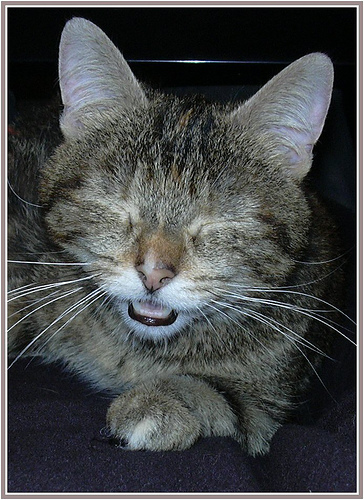

'an image of car'

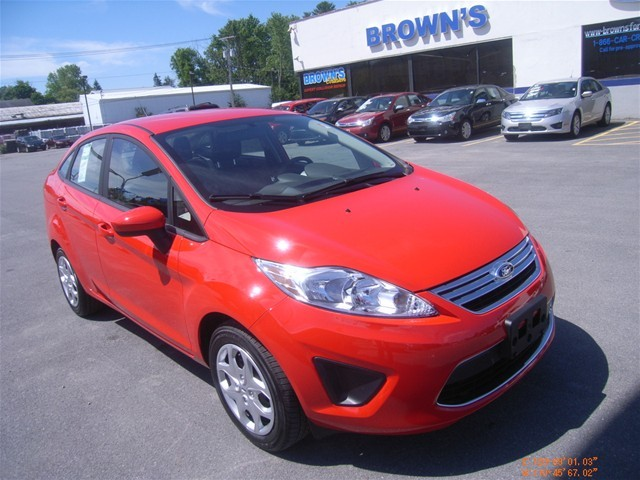

In [11]:
# display an example of a cat image-text pair data
display(cat_img_txt_pairs[0]['caption'])
display(cat_img_txt_pairs[0]['pil_img'])

# display an example of a car image-text pair data
display(car_img_txt_pairs[0]['caption'])
display(car_img_txt_pairs[0]['pil_img'])

In [ ]:
# compute BridgeTower embeddings for cat image-text pairs
cat_embeddings = []
for img_txt_pair in tqdm(
                        cat_img_txt_pairs, 
                        total=len(cat_img_txt_pairs)
                    ):
    pil_img = img_txt_pair['pil_img']
    caption = img_txt_pair['caption']
    base64_img = encode_image(pil_img)
    embedding = bt_embeddings(caption, base64_img)
    cat_embeddings.append(embedding)

# compute BridgeTower embeddings for car image-text pairs
car_embeddings = []
for img_txt_pair in tqdm(
                        car_img_txt_pairs, 
                        total=len(car_img_txt_pairs)
                    ):
    pil_img = img_txt_pair['pil_img']
    caption = img_txt_pair['caption']
    base64_img = encode_image(pil_img)
    embedding = bt_embeddings(caption, base64_img)
    car_embeddings.append(embedding)
                        

 20%|██        | 10/50 [00:05<00:20,  1.91it/s]

In [ ]:
# function transforms high-dimension vectors to 2D vectors using UMAP
def dimensionality_reduction(embed_arr, label):
    X_scaled = MinMaxScaler().fit_transform(embed_arr)
    print(X_scaled)
    mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
    df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
    df_emb["label"] = label
    print(df_emb)
    return df_emb

In [ ]:
# stacking embeddings of cat and car examples into one numpy array
all_embeddings = np.concatenate([cat_embeddings, car_embeddings])

# prepare labels for the 3 examples
labels = ['cat'] * len(cat_embeddings) + ['car'] * len(car_embeddings)

# compute dimensionality reduction for the 3 examples
reduced_dim_emb = dimensionality_reduction(all_embeddings, labels)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the centroids against the cluster
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize

sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(data=reduced_dim_emb, 
                x=reduced_dim_emb['X'], 
                y=reduced_dim_emb['Y'], 
                hue='label', 
                palette='bright')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of images of cats and cars using UMAP')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<p style="background-color:#fff1d7; padding:15px; "> <b>Note:</b>
<br>
- The embeddings of image-text pairs of `cats` (i.e., blue dots) are
<br>
closed to each other.
<br>
- The embeddings of image-text pairs of `cars` (i.e., orange dots) are
<br>
closed to each other.
<br>
- The embeddings of image-text pairs of `cats` (blue dots) are far away
<br>
from the embeddings of image-text pairs of `cars` (orange dots).
<br>
Note that UMAP includes some randomness, Your clusters may not appear the same as those in the videos however cats and cars should still be clustered separately.
</p>

<p style="background-color:#fff1d7; padding:15px; "> <b>Notes:</b>
<br>
- While we presented the two metrics: Cosine Similarity and 
<br>
Euclidean Distance, and one visualization technique for embeddings:
<br>
UMAP above to demonstrate the meaning of embeddings, 
<br>
you can also use other metrics (e.g., Cosine Distance and
<br>
Minkowski Distance) and other visualization techniques (e.g., t-SNE)
<br>
to verify the embeddings.
<br>
- There are other multimodal embedding models that can compute 
<br>
the embeddings for images and texts like BridgeTower does. For example,
<br>
<a href="https://github.com/openai/CLIP">CLIP</a> for image embedding and <a href="https://huggingface.co/sentence-transformers">Sentence Transformer</a> for text embedding.

</p>